# <font color='green'>Refugiados no Brasil</font>


## <font color='black'>Extração de Dados do fluxos migratórios internacionais no Brasil</font>

### <font color='black'>Jennifer Plothow</font>

> Diversas pessoas saem diariamente de seus de países de origem ou de onde têm residência fixa para morar em outro. Os motivos são vários: para estudar, para buscar melhores condições de vida, mais oportunidades de trabalho, para aprender uma nova cultura. Esse movimento se chama migração internacional. No geral, essa movimentação é voluntária e quando essas pessoas chegam ao novo país, elas são consideradas imigrantes. O Brasil é formado por imigrantes. Historicamente, o país recebeu pessoas vindas da Europa, da Ásia, da África. E esse movimento nunca parou. Diariamente pessoas chegam ao país e muitas decidem residir aqui.Mas há 
**AUTORIZAÇÃO DE RESIDÊNCIA PARA NACIONALIDADES ESPECÍFICAS**,que prevêem críterios de autorização de residência para algumas nacionalidades específicas.



 Os dados do governo são uma das grandes fontes de dados abertos que existem. No entanto, devido ao formato do conjunto de dados, os usuários precisam limpar e reorganizar os dados para análise posterior, então analisaremos o conjunto de dados de pedidos imigrações.Analisar o os deferimentos e indeferimentos, a quantidade e porpoção de imigração no Brasil



**_Categorias_**

* Deferido: pessoas reconhecidas como refugiadas nos termos da lei;
* Indeferido: pessoas não reconhecidas como refugiadas por estarem  ausentes os critérios;
* Extinção: sem resolução do processo,razões por alguma razão presente ou quando o requerente desiste, abandona;
* Arquivado: processos arquivados.



**Para obter os dados**

<https://www.gov.br/mj/pt-br/assuntos/seus-direitos/refugio/refugio-em-numeros-e-publicacoes/capa>


In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%reload_ext watermark
%watermark -a "J.Plothow" --iversions

Author: J.Plothow

matplotlib: 3.5.1
seaborn   : 0.11.1
pandas    : 1.2.4
csv       : 1.0
numpy     : 1.21.5



## Carregando os Dados

In [184]:
df1 = pd.read_excel("dados/2020.xlsx")
df2 = pd.read_excel("dados/2021.xlsx")

In [185]:
df1.shape

(26810, 7)

In [186]:
df2.shape

(2100, 7)

In [187]:
df_dados=df1.merge(df2,how='outer')

In [188]:
df_dados

,STATUS - Requerimento,ANO SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,ELEGIBILIDADE - DEFERIDO,2018,VENEZUELA,M,1993,RIO DE JANEIRO,2020-01-31
1,ELEGIBILIDADE - DEFERIDO,2017,VENEZUELA,M,1994,SÃO PAULO,2020-01-31
2,ELEGIBILIDADE - DEFERIDO,2013,VENEZUELA,M,1981,MANAUS,2020-01-31
3,ELEGIBILIDADE - DEFERIDO,2018,VENEZUELA,M,1969,SÃO PAULO,2020-01-31
4,ELEGIBILIDADE - DEFERIDO,2018,VENEZUELA,F,1968,SÃO PAULO,2020-01-31
...,...,...,...,...,...,...,...
28905,CESSAÇÃO,2015,SÍRIA,M,1968,SÃO PAULO,2021-06-17
28906,CESSAÇÃO,2014,IRAQUE,M,1986,RIO DE JANEIRO,2021-06-17
28907,CESSAÇÃO,2013,LÍBANO,M,1988,SÃO PAULO,2021-06-17
28908,CESSAÇÃO,2014,SÍRIA,M,1990,GUARUJÁ,2021-06-17


## Formatação dos Dados

In [189]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28910 entries, 0 to 28909
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   STATUS - Requerimento  28910 non-null  object        
 1   ANO  SOLICITAÇÃO       28910 non-null  int64         
 2   PAÍS DE ORIGEM         28910 non-null  object        
 3   GÊNERO                 28910 non-null  object        
 4   ANO DE NASCIMENTO      28910 non-null  int64         
 5   CIDADE SOLICITAÇÃO     28910 non-null  object        
 6   DATA DA  DECISÃO       28910 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.8+ MB


In [190]:
df_dados.isna().any()


STATUS - Requerimento    False
ANO  SOLICITAÇÃO         False
PAÍS DE ORIGEM           False
GÊNERO                   False
ANO DE NASCIMENTO        False
CIDADE SOLICITAÇÃO       False
DATA DA  DECISÃO         False
dtype: bool

In [191]:
df_dados.dtypes

STATUS - Requerimento            object
ANO  SOLICITAÇÃO                  int64
PAÍS DE ORIGEM                   object
GÊNERO                           object
ANO DE NASCIMENTO                 int64
CIDADE SOLICITAÇÃO               object
DATA DA  DECISÃO         datetime64[ns]
dtype: object

In [192]:
df_dados.shape

(28910, 7)

In [193]:
df_dados.replace(to_replace ="ELEGIBILIDADE - DEFERIDO",
                 value ="DEFERIDO",inplace=True)

In [194]:
df_dados.replace(to_replace ="CESSAÇÃO",
                 value ="CESSADO",inplace=True)

In [195]:
df_dados.replace(to_replace ="ELEGIBILIDADE - INDEFERIDO",
                 value ="INDEFERIDO",inplace=True)

In [196]:
df_dados.replace(to_replace ="EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO - DEFERIDO",
                 value ="EXTENÇÃO-DEFERIDO",inplace=True)

In [197]:
df_dados.replace(to_replace ="EXTENSÃO DOS EFEITOS DA CONDIÇÃO DE REFUGIADO - INDEFERIDO",
                 value ="EXTENÇÃO-INDEFERIDO",inplace=True)

In [198]:
df_dados.tail()

,STATUS - Requerimento,ANO SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
28905,CESSADO,2015,SÍRIA,M,1968,SÃO PAULO,2021-06-17
28906,CESSADO,2014,IRAQUE,M,1986,RIO DE JANEIRO,2021-06-17
28907,CESSADO,2013,LÍBANO,M,1988,SÃO PAULO,2021-06-17
28908,CESSADO,2014,SÍRIA,M,1990,GUARUJÁ,2021-06-17
28909,CESSADO,2013,SUDÃO,M,1987,BRASÍLIA,2021-06-17


In [199]:
df_dados.head()

,STATUS - Requerimento,ANO SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,DEFERIDO,2018,VENEZUELA,M,1993,RIO DE JANEIRO,2020-01-31
1,DEFERIDO,2017,VENEZUELA,M,1994,SÃO PAULO,2020-01-31
2,DEFERIDO,2013,VENEZUELA,M,1981,MANAUS,2020-01-31
3,DEFERIDO,2018,VENEZUELA,M,1969,SÃO PAULO,2020-01-31
4,DEFERIDO,2018,VENEZUELA,F,1968,SÃO PAULO,2020-01-31


In [200]:
df_dados.columns

Index(['STATUS - Requerimento', 'ANO  SOLICITAÇÃO', 'PAÍS DE ORIGEM', 'GÊNERO',
       'ANO DE NASCIMENTO', 'CIDADE SOLICITAÇÃO', 'DATA DA  DECISÃO'],
      dtype='object')

> Dados limpos e organizados

## Análise Exploratória

In [201]:
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

In [202]:
df_dados.describe(include='object')

,STATUS - Requerimento,PAÍS DE ORIGEM,GÊNERO,CIDADE SOLICITAÇÃO
count,28910,28910,28910,28910
unique,7,83,3,134
top,DEFERIDO,VENEZUELA,M,BOA VISTA
freq,24992,27154,18110,12949


In [213]:
df=df_dados

In [236]:
df_pais=df.groupby(['PAÍS DE ORIGEM','CIDADE SOLICITAÇÃO'])['STATUS - Requerimento'].value_counts()


In [237]:
df_pais=pd.DataFrame(df_pais)

In [240]:
df_pais

STATUS - Requerimento
PAÍS DE ORIGEM CIDADE SOLICITAÇÃO STATUS - Requerimento                       
AFEGANISTÃO    "a definir"        CESSADO                                    1
               GOIÂNIA            DEFERIDO                                   1
               GUARULHOS          DEFERIDO                                   2
               SÃO PAULO          DEFERIDO                                   4
                                  EXTENÇÃO-DEFERIDO                          3
...                                                                        ...
ÍNDIA          FOZ DO IGUAÇU      INDEFERIDO                                 1
               RIO DE JANEIRO     DEFERIDO                                   1
               SÃO PAULO          INDEFERIDO                                 2
                                  DEFERIDO                                   1
               VITÓRIA            DEFERIDO                                   1

[637 rows x 1 columns]

In [212]:
df_pais

,index,0,1
0,0,AFEGANISTÃO,"16527 SÃO PAULO 16659 ""a definir"" 1786..."
1,1,ALEMANHA,"26463 BRASÍLIA 26478 ""a definir"" Name..."
2,2,ANGOLA,2101 SÃO PAULO 2109 SÃO PAUL...
3,3,ARGENTINA,"26464 ""a definir"" 26465 ""a definir"" 2646..."
4,4,ARGÉLIA,"28300 MANAUS Name: CIDADE SOLICITAÇÃO, dtyp..."
...,...,...,...
78,78,UGANDA,"26600 NITERÓI Name: CIDADE SOLICITAÇÃO, dty..."
79,79,UNIÃO SOVIÉTICA,17935 GUARUJÁ 18000 GUARUJÁ Name: CIDADE...
80,80,VENEZUELA,0 RIO DE JANEIRO 1 SÃO PAUL...
81,81,ÁFRICA DO SUL,18249 SÃO PAULO 28413 SÃO PAULO Name: CI...


Text(0, 0.5, 'Total')

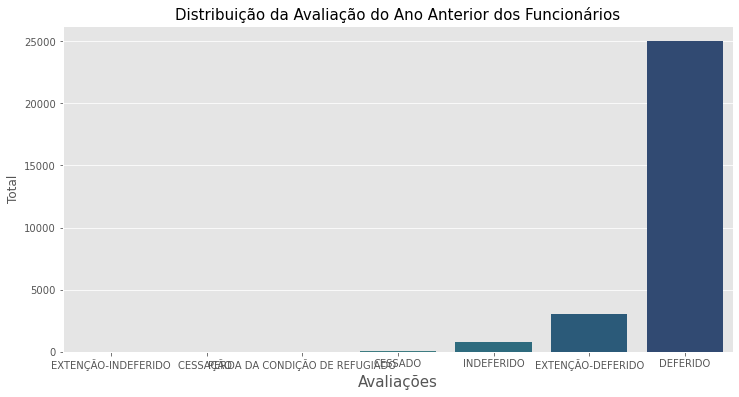

In [113]:
plt.figure(figsize=(12, 6))
status=df_dados['STATUS - Requerimento'].value_counts().sort_values().index
#print(df['Sport'].value_counts())
sns.countplot(data=df_dados, x='STATUS - Requerimento',palette="crest",order=status)
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')

In [116]:
data = df_dados[['PAÍS DE ORIGEM','GÊNERO','STATUS - Requerimento']]

In [117]:
data[data['STATUS - Requerimento']!='DEFERIDO']

,PAÍS DE ORIGEM,GÊNERO,STATUS - Requerimento
2027,EL SALVADOR,M,PERDA DA CONDIÇÃO DE REFUGIADO
2028,EL SALVADOR,F,PERDA DA CONDIÇÃO DE REFUGIADO
2029,EL SALVADOR,M,PERDA DA CONDIÇÃO DE REFUGIADO
2030,EL SALVADOR,F,PERDA DA CONDIÇÃO DE REFUGIADO
2031,IUGOSLÁVIA,F,CESSADO
...,...,...,...
28905,SÍRIA,M,CESSADO
28906,IRAQUE,M,CESSADO
28907,LÍBANO,M,CESSADO
28908,SÍRIA,M,CESSADO


### Salvando em CSV

In [82]:
df_dados.to_csv('dados/dado_gov.csv',index=False)